In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
train=pd.read_csv("/content/sample_data/SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test=pd.read_csv("/content/sample_data/SalaryData_Test.csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [ ]:
cat_col=list()
for col in train.columns:
  if train[col].dtype=='object':
    cat_col.append(col)
    print("*________________{}_____________________*".format(col))
    print(train[col].value_counts())

*________________workclass_____________________*
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
*________________education_____________________*
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
*________________maritalstatus_____________________*
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dty

In [ ]:
print(cat_col)

['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


*________________workclass_____________________*


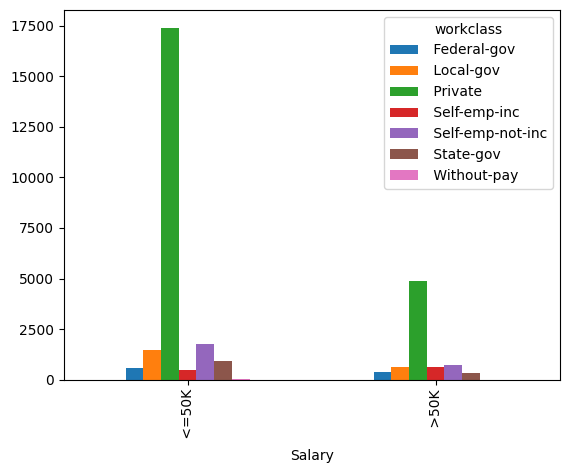

*________________education_____________________*


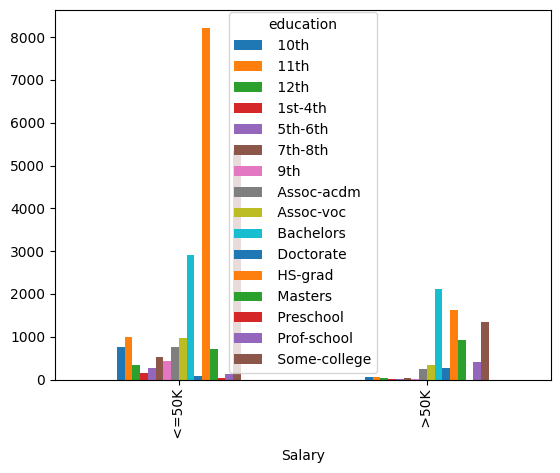

*________________maritalstatus_____________________*


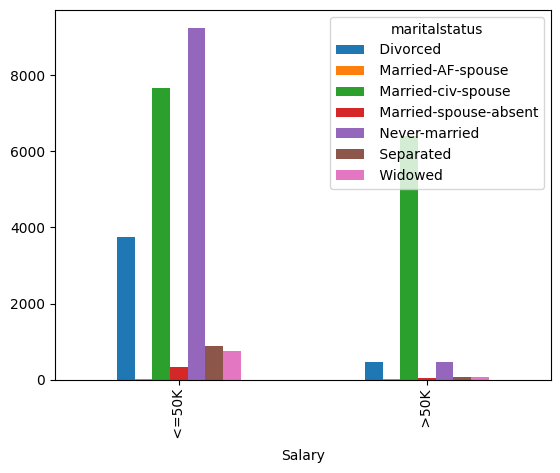

*________________occupation_____________________*


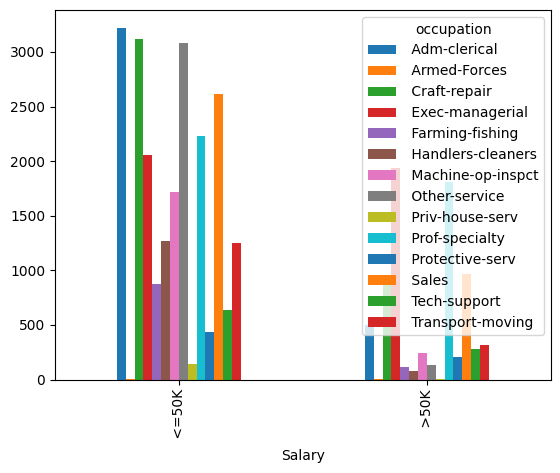

*________________relationship_____________________*


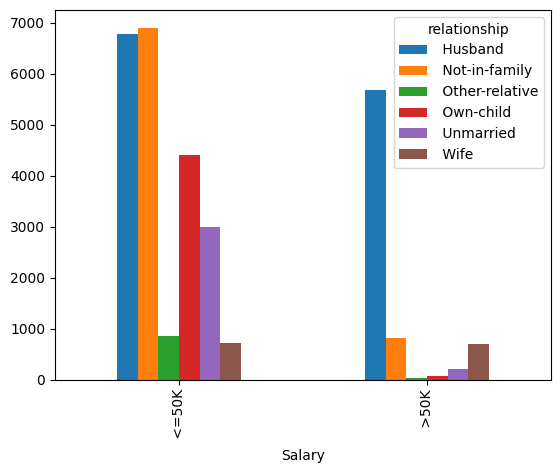

*________________race_____________________*


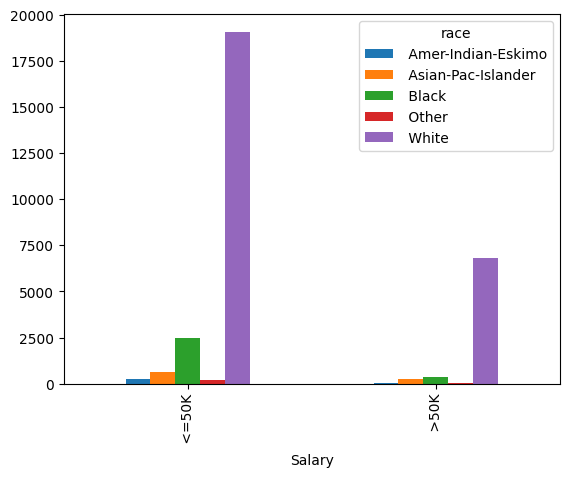

*________________sex_____________________*


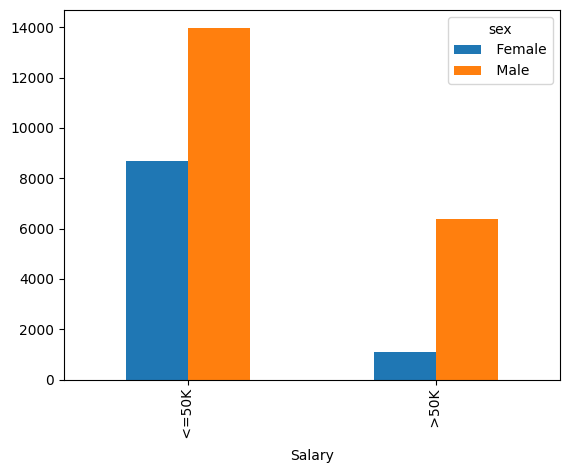

*________________native_____________________*


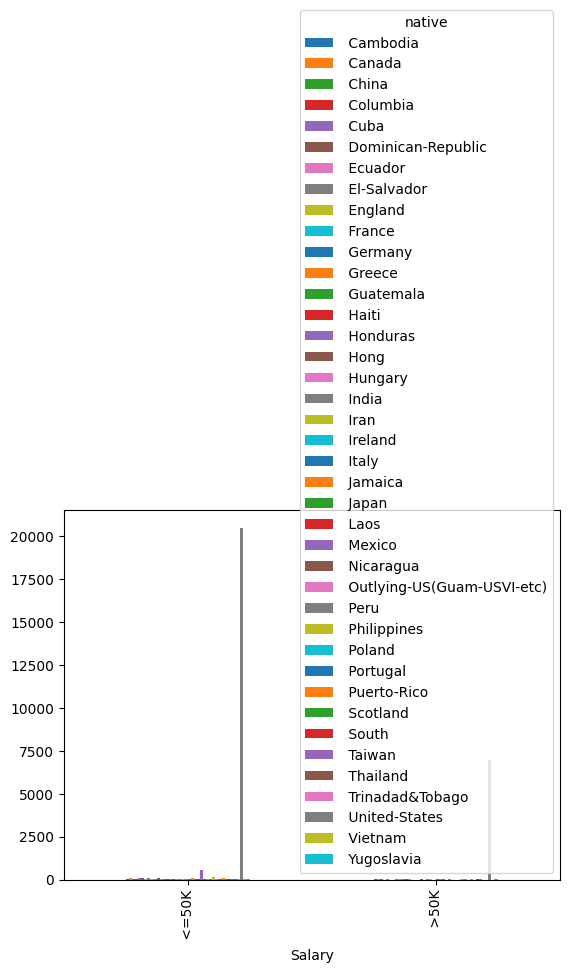

*________________Salary_____________________*


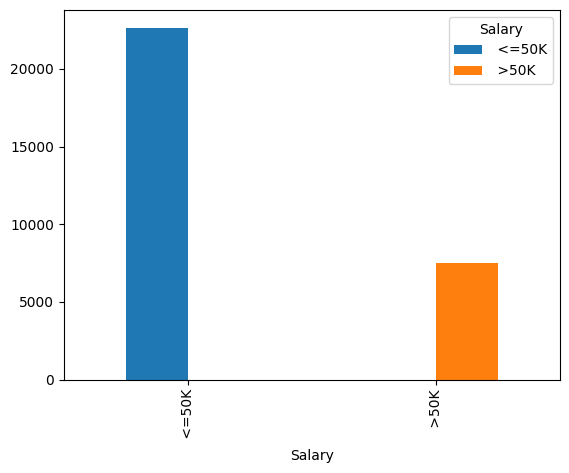

In [ ]:
for col in cat_col:
  print("*________________{}_____________________*".format(col))
  #sns.countplot(x=col,data=train)
  pd.crosstab(train['Salary'],train[col]).plot(kind='bar')
  plt.show()

In [ ]:
train.isnull().sum()# there is no null value

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


there are not duplicated some values are same so it is comimg as duplicate one

In [ ]:
for var in cat_col:
    print(var, ' contains ', len(train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


lets transform the categorical columns

In [ ]:
x_train=train.drop('Salary',axis=1)
y_train=train[['Salary']]

x_test=test.drop('Salary',axis=1)
y_test=test[['Salary']]

In [ ]:
cat_col_sal=cat_col
cat_col.remove('Salary')
cat_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [ ]:
le=LabelEncoder()
for i in cat_col:
  x_train[i]=le.fit_transform(x_train[i])
  x_test[i]=le.fit_transform(x_test[i])

In [ ]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [ ]:
x_test


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [ ]:
def make_normalizatio(i):
  return (i-i.min())/(i.max()-i.min())

In [ ]:
x_train=make_normalizatio(x_train)
x_test=make_normalizatio(x_test)

In [ ]:
#scalar=RobustScaler()
#x_train=scalar.fit_transform(x_train)
#x_test=scalar.fit_transform(x_test)

In [ ]:
x_train

array([[0.00037092, 0.00039986, 0.0003632 , ..., 0.00036987, 0.00036987,
        0.00036987],
       [0.00037671, 0.00038986, 0.0003632 , ..., 0.00036987, 0.00031589,
        0.00036987],
       [0.00037039, 0.00036987, 0.00036987, ..., 0.00036987, 0.00036987,
        0.00036987],
       ...,
       [0.00038092, 0.00036987, 0.00036987, ..., 0.00036987, 0.00036987,
        0.00036987],
       [0.00036197, 0.00036987, 0.00036987, ..., 0.00036987, 0.00032988,
        0.00036987],
       [0.00037776, 0.00037986, 0.00036987, ..., 0.00036987, 0.00036987,
        0.00036987]])

In [ ]:
x_test

array([[0.00036387, 0.00036987, 0.00033655, ..., 0.00036987, 0.00036987,
        0.00036987],
       [0.00037037, 0.00036987, 0.00036987, ..., 0.00036987, 0.00038986,
        0.00036987],
       [0.00036537, 0.00035987, 0.00035654, ..., 0.00036987, 0.00036987,
        0.00036987],
       ...,
       [0.00037037, 0.00036987, 0.0003632 , ..., 0.00036987, 0.00038986,
        0.00036987],
       [0.00037337, 0.00036987, 0.0003632 , ..., 0.00036987, 0.00036987,
        0.00036987],
       [0.00036887, 0.00037986, 0.0003632 , ..., 0.00036987, 0.00040985,
        0.00036987]])

MODEL BUILDING

here we have continious x avlue so we will go with GaussianNB()

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [ ]:
print("model accuracy score {0:0.4f}".format(accuracy_score(y_test,y_pred)))

model accuracy score 0.7931


In [ ]:
print("Traing model accuracy score {0:0.4f}".format(gnb.score(x_train,y_train)))
print("Test model accuracy score {0:0.4f}".format(gnb.score(x_test,y_test)))

Traing model accuracy score 0.7925
Test model accuracy score 0.7931


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10772   588]
 [ 2528  1172]]


In [ ]:
y_test.value_counts()

Salary
 <=50K    11360
 >50K      3700
dtype: int64

In [ ]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.32      0.43      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060

